<a href="https://colab.research.google.com/github/GoradiaNishant/Deep-Learning/blob/main/case_study_UNet_vs_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unet

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
img_width = 128
img_height = 128
img_channels = 3

In [3]:
inputs = tf.keras.layers.Input((img_width,img_height,img_channels))

Model architecture initialization
**Down path**


In [4]:
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [5]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

In [6]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

In [7]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

In [8]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

In [9]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

**Expansive Path**

In [10]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [11]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [12]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [13]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [14]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(c9)

In [15]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [17]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images

/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images


In [20]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images'

In [21]:
w, h = 128,128

In [22]:
import os
ids = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  100


In [23]:
import glob
train = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/*"))
train_mask = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_segmentation/*.png"))
print(f'Total Train Images : {len(train)}\nTotal Mask Image : {len(train_mask)}')

Total Train Images : 100
Total Mask Image : 100


In [24]:
import numpy as np
X = np.zeros((len(train), h, w, 3), dtype=np.float32)
y = np.zeros((len(train_mask), h, w, 1), dtype=np.float32)

In [25]:
from tqdm.notebook import trange, tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
for n, (img, mimg) in tqdm(enumerate(zip(train, train_mask))):
  ##print(n, img, mimg)
  # Load images
  img = load_img(img)
  x_img = img_to_array(img)
  x_img = resize(x_img, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask = img_to_array(load_img(mimg, color_mode = "grayscale"))
  mask = resize(mask, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X[n] = x_img/255.0
  y[n] = mask/255.0

0it [00:00, ?it/s]

In [26]:
# Save the files in Numpy array for reusability
np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy', X)
np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy', y)
# print(X.shape, y.shape)
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [27]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


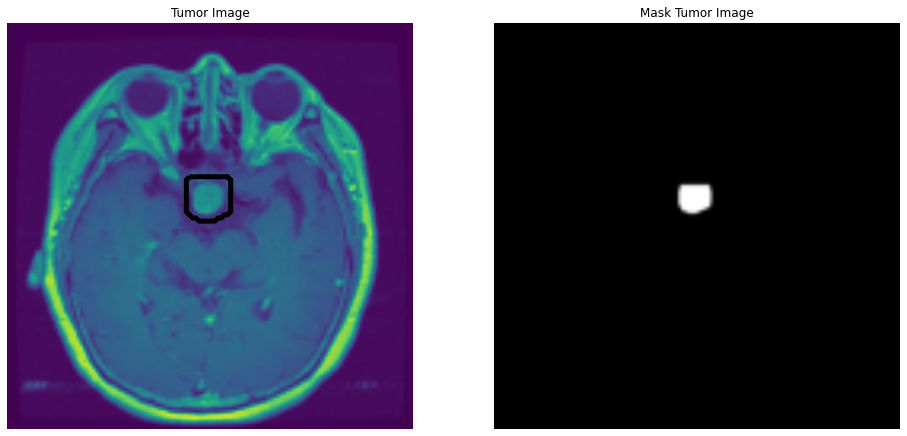

In [28]:
# Visualize any randome image along with the mask
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

ax1.imshow(X_train[ix, ..., 0], interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Tumor Image')
ax1.set_axis_off()
ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask Tumor Image')
ax2.set_axis_off()

In [29]:
result = model.fit(X_train, y_train, batch_size=2, epochs=100, callbacks=callbacks, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)

Epoch 1/100
40/40 - 14s - loss: 0.2682 - accuracy: 0.7871 - val_loss: 0.1421 - val_accuracy: 0.8099 - 14s/epoch - 338ms/step
Epoch 2/100
40/40 - 1s - loss: 0.1606 - accuracy: 0.7874 - val_loss: 0.1383 - val_accuracy: 0.8099 - 1s/epoch - 37ms/step
Epoch 3/100
40/40 - 2s - loss: 0.1484 - accuracy: 0.7874 - val_loss: 0.1841 - val_accuracy: 0.8099 - 2s/epoch - 38ms/step
Epoch 4/100
40/40 - 2s - loss: 0.1438 - accuracy: 0.7874 - val_loss: 0.1111 - val_accuracy: 0.8099 - 2s/epoch - 38ms/step
Epoch 5/100
40/40 - 1s - loss: 0.1448 - accuracy: 0.7874 - val_loss: 0.1128 - val_accuracy: 0.8099 - 1s/epoch - 37ms/step
Epoch 6/100
40/40 - 2s - loss: 0.1364 - accuracy: 0.7874 - val_loss: 0.1217 - val_accuracy: 0.8099 - 2s/epoch - 38ms/step
Epoch 7/100
40/40 - 2s - loss: 0.1407 - accuracy: 0.7874 - val_loss: 0.1278 - val_accuracy: 0.8099 - 2s/epoch - 38ms/step


In [30]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('tumor Image')
    ax[0].set_axis_off()

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('tumor Mask Image')
    ax[1].set_axis_off()

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Segmented image')
    ax[2].set_axis_off()
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('tumor Mask binary Image');
    ax[3].set_axis_off()    

In [31]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.1278 - accuracy: 0.8099


[0.12775731086730957, 0.8099365234375]

In [32]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 33ms/step


In [33]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


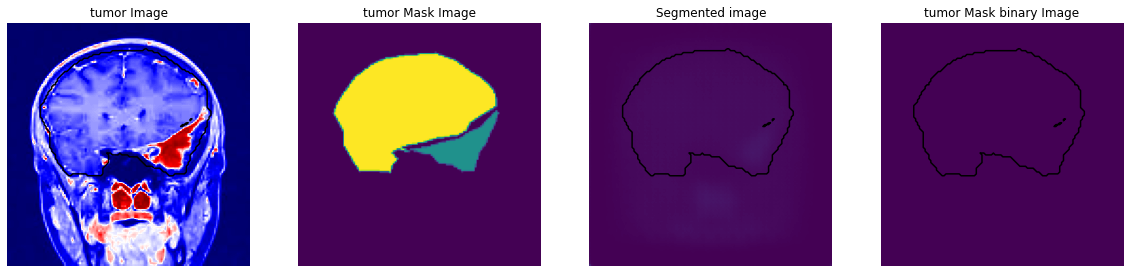

In [34]:
plot_sample(X_test, y_test, preds_val, preds_val_t,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


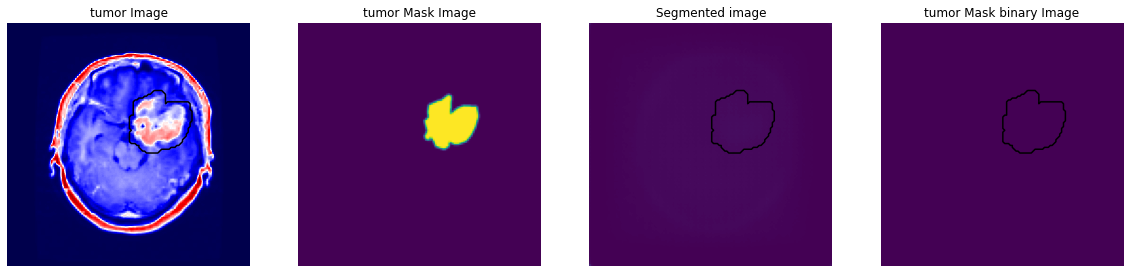

In [35]:
plot_sample(X_test, y_test, preds_val, preds_val_t)

In [36]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model/assets


In [37]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

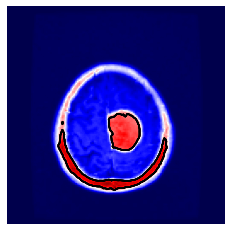

In [ ]:
fileloc = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg" #@param ["/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg"]

def predictImage(fileloc):
  X1 = np.zeros((len(train), h, w, 3), dtype=np.float32)
  y1 = np.zeros((len(train), h, w, 1), dtype=np.float32)

  # Load images
  img1 = load_img(fileloc)
  img2 = load_img(fileloc, color_mode = "grayscale")

  x_img1 = img_to_array(img1)
  x_img1 = resize(x_img1, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask1 = img_to_array(img2)
  mask1 = resize(mask1, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X1[0] = x_img1/255.0
  y1[0] = mask1/255.0

  ## show imagespv = new_model.predict(X1, verbose=1)
  pr = new_model.predict(X1)

  has_mask = y1[0].max() > 0
  # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # ax[0].imshow(X1[0, ..., 0], cmap='seismic')
  # ax[1].contour(y[0].squeeze(), colors='k', levels=[0.5])

  # fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  plt.imshow(X1[0, ..., 0], cmap='seismic')
  if has_mask:
      plt.contour(y1[0].squeeze(), colors='k', levels=[0.5])
  plt.axis('off')

  # plt.set_title('tumor Image')
  # plt.set_axis_off()
  # pv_t = (pr > 0.5).astype(np.uint8)

  # plot_sample(X1, y1, pr, pv_t,0)

for i in range(6):
  predictImage(fileloc)

In [ ]:
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/0001-0193.mkv')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
      break
    
    cv2_imshow(frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

# Resnet

Model architecture initialization
**Down path for ResUnet**


In [38]:
!pip install -q -U tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [39]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")
%matplotlib inline
import gc

from tqdm.notebook import trange, tqdm

from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K

  
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *

import random 

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [40]:
img_width = 128
img_height = 128
img_channels = 3

In [41]:
inputs1 = tf.keras.layers.Input((img_width,img_height,img_channels))

In [42]:
def batch_Norm_Activation(x, BN=False): ## To Turn off Batch Normalization, Change BN to False >
    if BN == True:
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
    else:
        x= Activation("relu")(x)
    return x


def ResUnet(image_size):
    inputs = Input(shape=(image_size, image_size, 3))
    filters = 16
 
    # Encoder       
    conv = Conv2D(filters*1, kernel_size= (3,3), padding= 'same', strides= (1,1))(inputs)
    conv = batch_Norm_Activation(conv)
    conv = Conv2D(filters*1, kernel_size= (3,3), padding= 'same', strides= (1,1))(conv)
    shortcut = Conv2D(filters*1, kernel_size=(1,1), padding='same', strides=(1,1))(inputs)
    shortcut = batch_Norm_Activation(shortcut)
    output1 = add([conv, shortcut])
    
    res1 = batch_Norm_Activation(output1)
    res1 = Conv2D(filters*2, kernel_size= (3,3), padding= 'same', strides= (2,2))(res1)
    res1 = batch_Norm_Activation(res1)
    res1 = Conv2D(filters*2, kernel_size= (3,3), padding= 'same', strides= (1,1))(res1)
    shortcut1 = Conv2D(filters*2, kernel_size= (3,3), padding='same', strides=(2,2))(output1)
    shortcut1 = batch_Norm_Activation(shortcut1)
    output2 = add([shortcut1, res1])
    
    res2 = batch_Norm_Activation(output2)
    res2 = Conv2D(filters*4, kernel_size= (3,3), padding= 'same', strides= (2,2))(res2)
    res2 = batch_Norm_Activation(res2)
    res2 = Conv2D(filters*4, kernel_size= (3,3), padding= 'same', strides= (1,1))(res2)
    shortcut2 = Conv2D(filters*4, kernel_size= (3,3), padding='same', strides=(2,2))(output2)
    shortcut2 = batch_Norm_Activation(shortcut2)
    output3 = add([shortcut2, res2])
    
    res3 = batch_Norm_Activation(output3)
    res3 = Conv2D(filters*8, kernel_size= (3,3), padding= 'same', strides= (2,2))(res3)
    res3 = batch_Norm_Activation(res3)
    res3 = Conv2D(filters*8, kernel_size= (3,3), padding= 'same', strides= (1,1))(res3)
    shortcut3 = Conv2D(filters*8, kernel_size= (3,3), padding='same', strides=(2,2))(output3)
    shortcut3 = batch_Norm_Activation(shortcut3)
    output4 = add([shortcut3, res3])
    
    res4 = batch_Norm_Activation(output4)
    res4 = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides= (2,2))(res4)
    res4 = batch_Norm_Activation(res4)
    res4 = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides= (1,1))(res4)
    shortcut4 = Conv2D(filters*16, kernel_size= (3,3), padding='same', strides=(2,2))(output4)
    shortcut4 = batch_Norm_Activation(shortcut4)
    output5 = add([shortcut4, res4])
    
    #bridge
    conv = batch_Norm_Activation(output5)
    conv = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides= (1,1))(conv)
    conv = batch_Norm_Activation(conv)
    conv = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides= (1,1))(conv)
    
    #decoder
   
    uconv1 = UpSampling2D((2,2))(conv)
    uconv1 = concatenate([uconv1, output4])
    
    uconv11 = batch_Norm_Activation(uconv1)
    uconv11 = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv11)
    uconv11 = batch_Norm_Activation(uconv11)
    uconv11 = Conv2D(filters*16, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv11)
    shortcut5 = Conv2D(filters*16, kernel_size= (3,3), padding='same', strides=(1,1))(uconv1)
    shortcut5 = batch_Norm_Activation(shortcut5)
    output6 = add([uconv11,shortcut5])
   
    uconv2 = UpSampling2D((2,2))(output6)
    uconv2 = concatenate([uconv2, output3])
    
    uconv22 = batch_Norm_Activation(uconv2)
    uconv22 = Conv2D(filters*8, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv22)
    uconv22 = batch_Norm_Activation(uconv22)
    uconv22 = Conv2D(filters*8, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv22)
    shortcut6 = Conv2D(filters*8, kernel_size= (3,3), padding='same', strides=(1,1))(uconv2)
    shortcut6 = batch_Norm_Activation(shortcut6)
    output7 = add([uconv22,shortcut6])
    
    uconv3 = UpSampling2D((2,2))(output7)
    uconv3 = concatenate([uconv3, output2])
   
    uconv33 = batch_Norm_Activation(uconv3)
    uconv33 = Conv2D(filters*4, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv33)
    uconv33 = batch_Norm_Activation(uconv33)
    uconv33 = Conv2D(filters*4, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv33)
    shortcut7 = Conv2D(filters*4, kernel_size= (3,3), padding='same', strides=(1,1))(uconv3)
    shortcut7 = batch_Norm_Activation(shortcut7)
    output8 = add([uconv33,shortcut7])
    
    uconv4 = UpSampling2D((2,2))(output8)
    uconv4 = concatenate([uconv4, output1])
    
    uconv44 = batch_Norm_Activation(uconv4)
    uconv44 = Conv2D(filters*2, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv44)
    uconv44 = batch_Norm_Activation(uconv44)
    uconv44 = Conv2D(filters*2, kernel_size= (3,3), padding= 'same', strides=(1,1))(uconv44)
    shortcut8 = Conv2D(filters*2, kernel_size= (3,3), padding='same', strides=(1,1))(uconv4)
    shortcut8 = batch_Norm_Activation(shortcut8)
    output9 = add([uconv44,shortcut8])
    
    output_layer = Conv2D(1, (3, 3), padding="same", activation="sigmoid")(output9)
    mmodel = Model(inputs, output_layer)
  
    return mmodel

In [43]:
from keras import backend as K
K.clear_session()

# input_img = Input((h, w, 3), name='img')
model1 = ResUnet(image_size = 128)
metrics = ["accuracy", 
           tf.keras.metrics.AUC(), 
           tf.keras.metrics.SensitivityAtSpecificity(0.5), 
           tf.keras.metrics.SpecificityAtSensitivity(0.5)]
model1.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=metrics)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images

/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images


In [ ]:
w, h = 128,128

In [63]:
import os
ids = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  100


In [64]:
import glob
train = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/*"))
train_mask = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_segmentation/*.png"))
print(f'Total Train Images : {len(train)}\nTotal Mask Image : {len(train_mask)}')

Total Train Images : 100
Total Mask Image : 100


In [ ]:
import numpy as np
X = np.zeros((len(train), h, w, 3), dtype=np.float32)
y = np.zeros((len(train_mask), h, w, 1), dtype=np.float32)

In [ ]:
from tqdm.notebook import trange, tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
for n, (img, mimg) in tqdm(enumerate(zip(train, train_mask))):
  ##print(n, img, mimg)
  # Load images
  img = load_img(img)
  x_img = img_to_array(img)
  x_img = resize(x_img, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask = img_to_array(load_img(mimg, color_mode = "grayscale"))
  mask = resize(mask, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X[n] = x_img/255.0
  y[n] = mask/255.0

0it [00:00, ?it/s]

In [44]:
# Save the files in Numpy array for reusability
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy', X)
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy', y)
# print(X.shape, y.shape)
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [45]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


In [47]:
checkpointer1 = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)
callbacks1 = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

result1 = model1.fit(X_train, y_train, batch_size=2, epochs=100, callbacks=callbacks1, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)

Epoch 1/100
40/40 - 10s - loss: 0.3223 - accuracy: 0.7872 - auc: 0.5811 - sensitivity_at_specificity: 0.6437 - specificity_at_sensitivity: 0.6127 - val_loss: 0.1103 - val_accuracy: 0.8099 - val_auc: 0.8951 - val_sensitivity_at_specificity: 0.9760 - val_specificity_at_sensitivity: 0.9265 - 10s/epoch - 246ms/step
Epoch 2/100
40/40 - 4s - loss: 0.1421 - accuracy: 0.7874 - auc: 0.8325 - sensitivity_at_specificity: 0.9608 - specificity_at_sensitivity: 0.8756 - val_loss: 0.1223 - val_accuracy: 0.8099 - val_auc: 0.8985 - val_sensitivity_at_specificity: 1.0000 - val_specificity_at_sensitivity: 0.9208 - 4s/epoch - 106ms/step
Epoch 3/100
40/40 - 4s - loss: 0.1321 - accuracy: 0.7874 - auc: 0.8716 - sensitivity_at_specificity: 0.9877 - specificity_at_sensitivity: 0.8977 - val_loss: 0.1104 - val_accuracy: 0.8099 - val_auc: 0.9218 - val_sensitivity_at_specificity: 0.9961 - val_specificity_at_sensitivity: 0.9466 - 4s/epoch - 106ms/step
Epoch 4/100
40/40 - 5s - loss: 0.1327 - accuracy: 0.7874 - auc: 0

###a

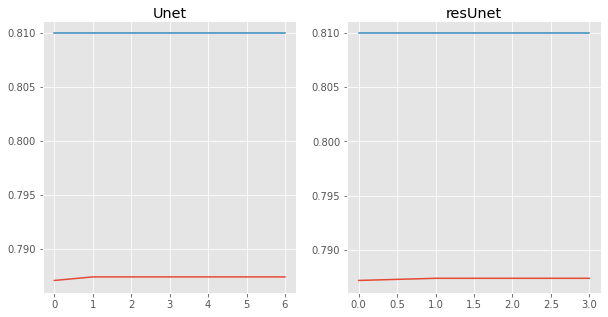

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))

#plot 1:
plt.subplot(1, 2, 1)
plt.title('Unet', pad=-50)
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='test')

#plot 2:
plt.subplot(1, 2, 2)
plt.title('resUnet', pad=-50)
plt.plot(result1.history['accuracy'], label='train')
plt.plot(result1.history['val_accuracy'], label='test')

plt.show()

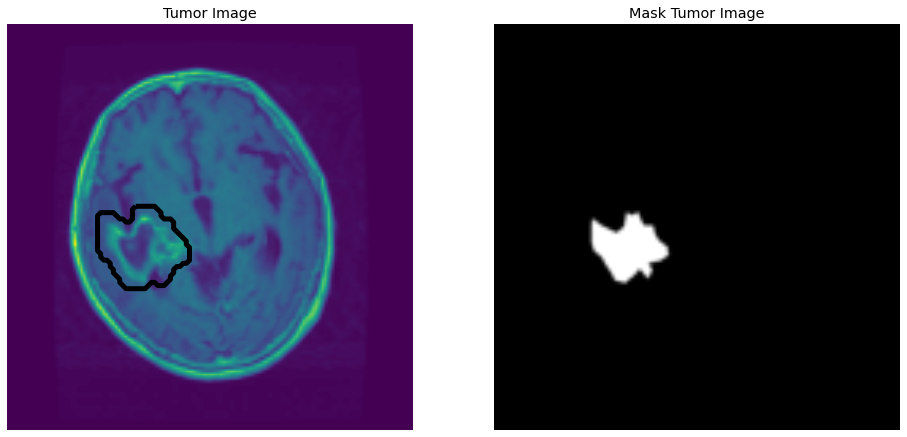

In [49]:
# Visualize any randome image along with the mask
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

ax1.imshow(X_train[ix, ..., 0], interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Tumor Image')
ax1.set_axis_off()
ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask Tumor Image')
ax2.set_axis_off()

In [50]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('tumor Image')
    ax[0].set_axis_off()

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('tumor Mask Image')
    ax[1].set_axis_off()

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Segmented image')
    ax[2].set_axis_off()
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('tumor Mask binary Image');
    ax[3].set_axis_off()    

In [51]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 193ms/step - loss: 0.1278 - accuracy: 0.8099


[0.12775731086730957, 0.8099365234375]

In [52]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 29ms/step


In [53]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

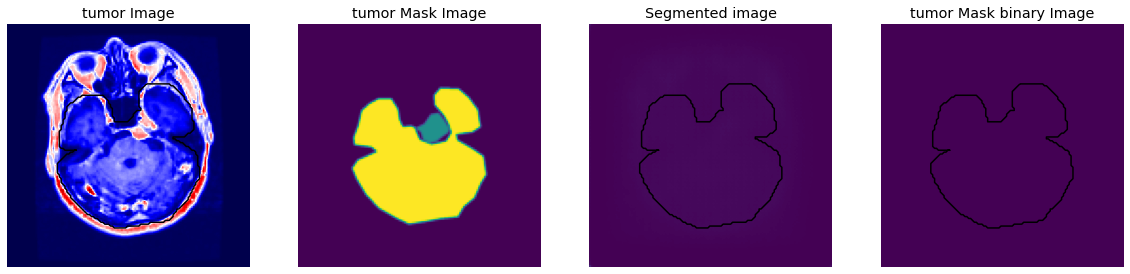

In [54]:
plot_sample(X_test, y_test, preds_val, preds_val_t,17)

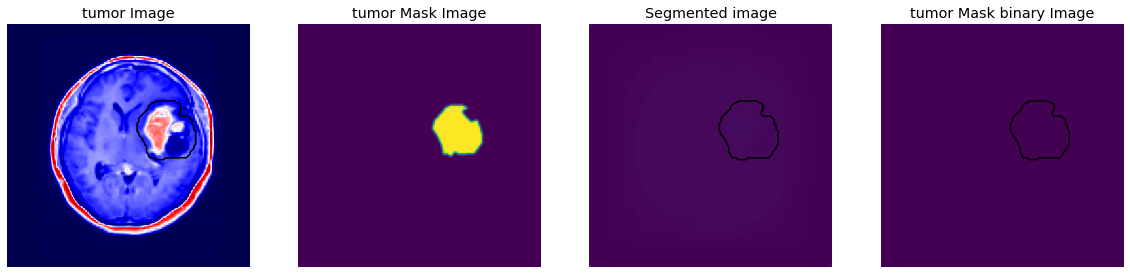

In [55]:
plot_sample(X_test, y_test, preds_val, preds_val_t)

In [56]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

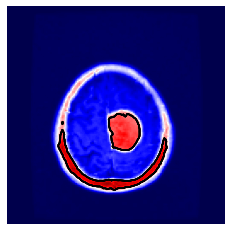

In [ ]:
fileloc = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg" #@param ["/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg"]

def predictImage(fileloc):
  X1 = np.zeros((len(train), h, w, 3), dtype=np.float32)
  y1 = np.zeros((len(train), h, w, 1), dtype=np.float32)

  # Load images
  img1 = load_img(fileloc)
  img2 = load_img(fileloc, color_mode = "grayscale")

  x_img1 = img_to_array(img1)
  x_img1 = resize(x_img1, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask1 = img_to_array(img2)
  mask1 = resize(mask1, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X1[0] = x_img1/255.0
  y1[0] = mask1/255.0

  ## show imagespv = new_model.predict(X1, verbose=1)
  pr = new_model.predict(X1)

  has_mask = y1[0].max() > 0
  # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # ax[0].imshow(X1[0, ..., 0], cmap='seismic')
  # ax[1].contour(y[0].squeeze(), colors='k', levels=[0.5])

  # fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  plt.imshow(X1[0, ..., 0], cmap='seismic')
  if has_mask:
      plt.contour(y1[0].squeeze(), colors='k', levels=[0.5])
  plt.axis('off')

  # plt.set_title('tumor Image')
  # plt.set_axis_off()
  # pv_t = (pr > 0.5).astype(np.uint8)

  # plot_sample(X1, y1, pr, pv_t,0)

for i in range(6):
  predictImage(fileloc)

###**Model with CLR**

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10
INIT_LR = 1e-4
MAX_LR = 1e-2

learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.8

# optimizers
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adam= tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# clr
steps_per_epoch = len(X_train)
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)
optimizer = tf.keras.optimizers.SGD(clr)

model1.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
40/40 - 5s - loss: 0.5329 - accuracy: 0.7152 - val_loss: 0.6850 - val_accuracy: 0.8099 - 5s/epoch - 133ms/step
Epoch 2/100
40/40 - 2s - loss: 0.5053 - accuracy: 0.7329 - val_loss: 0.6628 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 3/100
40/40 - 2s - loss: 0.4513 - accuracy: 0.7530 - val_loss: 0.6311 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 4/100
40/40 - 2s - loss: 0.3872 - accuracy: 0.7727 - val_loss: 0.5949 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 5/100
40/40 - 2s - loss: 0.3225 - accuracy: 0.7824 - val_loss: 0.5662 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 6/100
40/40 - 2s - loss: 0.2878 - accuracy: 0.7847 - val_loss: 0.5490 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 7/100
40/40 - 2s - loss: 0.2685 - accuracy: 0.7855 - val_loss: 0.5398 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 8/100
40/40 - 2s - loss: 0.2589 - accuracy: 0.7857 - val_loss: 0.5366 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 9/100
40/40 - 2s 

# Other achitecture for resUnet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
from keras.backend import int_shape
from keras.models import Model
from keras.layers import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, UpSampling2D, UpSampling3D, Add, BatchNormalization, Input, Activation, Lambda, Concatenate

img_width = 128
img_height = 128
img_channels = 3

def res_unet(filter_root, depth, n_class=2, input_size=(256, 256, 1), activation='relu', batch_norm=True, final_activation='softmax'):
    """
    Build UNet model with ResBlock.

    Args:
        filter_root (int): Number of filters to start with in first convolution.
        depth (int): How deep to go in UNet i.e. how many down and up sampling you want to do in the model. 
                    Filter root and image size should be multiple of 2^depth.
        n_class (int, optional): How many classes in the output layer. Defaults to 2.
        input_size (tuple, optional): Input image size. Defaults to (256, 256, 1).
        activation (str, optional): activation to use in each convolution. Defaults to 'relu'.
        batch_norm (bool, optional): To use Batch normaliztion or not. Defaults to True.
        final_activation (str, optional): activation for output layer. Defaults to 'softmax'.

    Returns:
        obj: keras model object
    """
    inputs = Input(input_size)
    x = inputs
    # Dictionary for long connections
    long_connection_store = {}

    if len(input_size) == 3:
        Conv = Conv2D
        MaxPooling = MaxPooling2D
        UpSampling = UpSampling2D
    elif len(input_size) == 4:
        Conv = Conv3D
        MaxPooling = MaxPooling3D
        UpSampling = UpSampling3D

    # Down sampling
    for i in range(depth):
        out_channel = 2**i * filter_root

        # Residual/Skip connection
        res = Conv(out_channel, kernel_size=1, padding='same', use_bias=False, name="Identity{}_1".format(i))(x)

        # First Conv Block with Conv, BN and activation
        conv1 = Conv(out_channel, kernel_size=3, padding='same', name="Conv{}_1".format(i))(x)
        if batch_norm:
            conv1 = BatchNormalization(name="BN{}_1".format(i))(conv1)
        act1 = Activation(activation, name="Act{}_1".format(i))(conv1)

        # Second Conv block with Conv and BN only
        conv2 = Conv(out_channel, kernel_size=3, padding='same', name="Conv{}_2".format(i))(act1)
        if batch_norm:
            conv2 = BatchNormalization(name="BN{}_2".format(i))(conv2)

        resconnection = Add(name="Add{}_1".format(i))([res, conv2])

        act2 = Activation(activation, name="Act{}_2".format(i))(resconnection)

        # Max pooling
        if i < depth - 1:
            long_connection_store[str(i)] = act2
            x = MaxPooling(padding='same', name="MaxPooling{}_1".format(i))(act2)
        else:
            x = act2

    # Upsampling
    for i in range(depth - 2, -1, -1):
        out_channel = 2**(i) * filter_root

        # long connection from down sampling path.
        long_connection = long_connection_store[str(i)]

        up1 = UpSampling(name="UpSampling{}_1".format(i))(x)
        up_conv1 = Conv(out_channel, 2, activation='relu', padding='same', name="upConv{}_1".format(i))(up1)

        #  Concatenate.
        up_conc = Concatenate(axis=-1, name="upConcatenate{}_1".format(i))([up_conv1, long_connection])

        #  Convolutions
        up_conv2 = Conv(out_channel, 3, padding='same', name="upConv{}_1".format(i))(up_conc)
        if batch_norm:
            up_conv2 = BatchNormalization(name="upBN{}_1".format(i))(up_conv2)
        up_act1 = Activation(activation, name="upAct{}_1".format(i))(up_conv2)

        up_conv2 = Conv(out_channel, 3, padding='same', name="upConv{}_2".format(i))(up_act1)
        if batch_norm:
            up_conv2 = BatchNormalization(name="upBN{}_2".format(i))(up_conv2)

        # Residual/Skip connection
        res = Conv(out_channel, kernel_size=1, padding='same', use_bias=False, name="upIdentity{}_1".format(i))(up_conc)

        resconnection = Add(name="upAdd{}_1".format(i))([res, up_conv2])

        x = Activation(activation, name="upAct{}_2".format(i))(resconnection)

    # Final convolution
    output = Conv(n_class, 1, padding='same', activation=final_activation, name='output')(x)

    return Model(inputs, outputs=output, name='Res-UNet')

In [ ]:
model=res_unet(16,6,2,(img_width,img_height,img_channels),)

ValueError: ignored